In [41]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('train.csv')
df.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [35]:
# basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67914 entries, 0 to 67913
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   image_id       67914 non-null  object 
 1   class_name     67914 non-null  object 
 2   class_id       67914 non-null  int64  
 3   rad_id         67914 non-null  object 
 4   x_min          36096 non-null  float64
 5   y_min          36096 non-null  float64
 6   x_max          36096 non-null  float64
 7   y_max          36096 non-null  float64
 8   bounding_size  36096 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 4.7+ MB
None


In [34]:
# check for duplicates
dupe_num = df.duplicated().sum()
print(f'Number of duplicate records: {dupe_num}')

Number of duplicate records: 0


In [10]:
# create feature for bounding box size
df['bounding_size'] = (df['x_max'] - df['x_min']) * (df['y_max'] - df['y_min'])

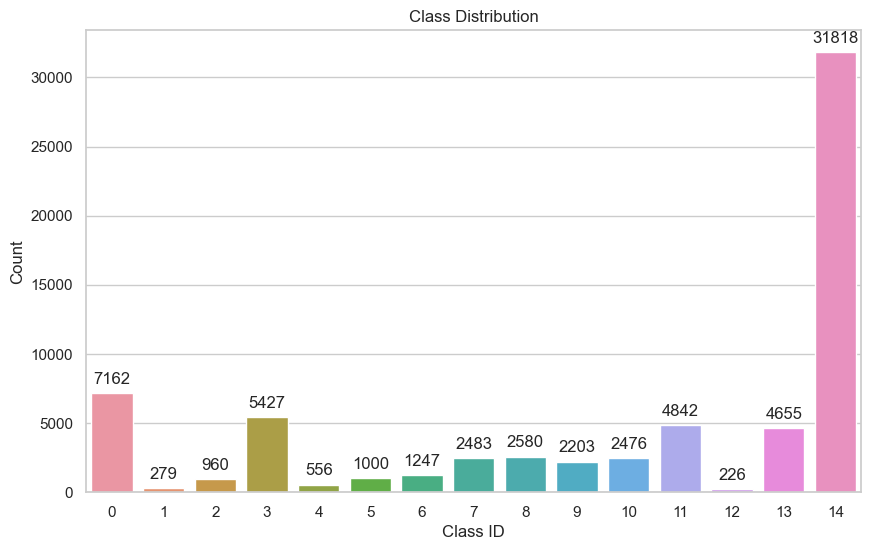

In [39]:
# plot class distribution
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='class_id', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Class Distribution')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.show()

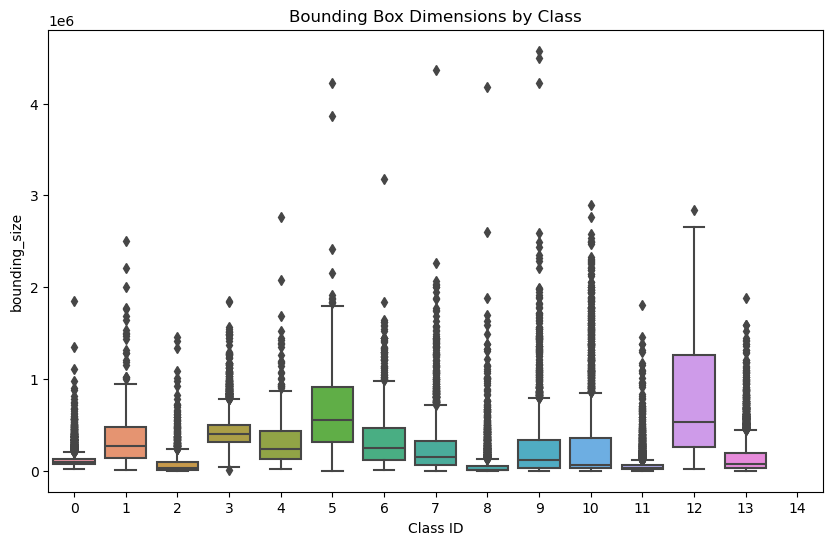

In [13]:
# plot bounding box dimensions
plt.figure(figsize=(10, 6))
sns.boxplot(x='class_id', y='bounding_size', data=df)
plt.title('Bounding Box Dimensions by Class')
plt.xlabel('Class ID')
plt.ylabel('bounding_size')
plt.show()

In [25]:
# determine how many images have multiple records
# num unique id's
image_id_unique_value_counts = df['image_id'].nunique()
print('unique image id\'s: ', image_id_unique_value_counts)
# >1 record per image
image_id_value_counts = df['image_id'].value_counts()
image_id_greater_than_1 = image_id_value_counts[image_id_value_counts > 1]
print("\nImage IDs with counts greater than 1: ", image_id_greater_than_1)
# images with more than one record
more_than_one_count = (image_id_value_counts > 1).sum()
print(f"\nNumber of image_id's with more than 1 record: {more_than_one_count}")
# total number of records containing a image_id with more than one record
total_duplicate_records = (image_id_value_counts[image_id_value_counts > 1]).sum()
print(f"\nTotal number of records containing duplicate image_id's: {total_duplicate_records}")

unique image id's:  15000

Image IDs with counts greater than 1:  03e6ecfa6f6fb33dfeac6ca4f9b459c9    57
fa109c087e46fe1ea27e48ce6d154d2f    52
e31be972e181987a8600a8700c1ebe88    48
6d5acf3f8a973a26844d617fffe72998    46
3a302fbbbf3364aa1a7731b59e6b98ec    46
                                    ..
be353c629cd9b269bbcb6623339283ae     3
43b0f51d257ee4154014ef7724a82644     3
9a4ed54cefaea64fc59bf8debdc79ec9     3
3018e6640df6a1e3f9978cf55c8d0fd3     3
839b2311ffad9bdd9aa98c74aad6e251     3
Name: image_id, Length: 15000, dtype: int64

Number of image_id's with more than 1 record: 15000

Total number of records containing duplicate image_id's: 67914


In [26]:
# show duplicate image_id records for 03e6ecfa6f6fb33dfeac6ca4f9b459c9, the most frequent image_id
selected_image_id = '03e6ecfa6f6fb33dfeac6ca4f9b459c9'
selected_records = df[df['image_id'] == selected_image_id]
selected_records

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,bounding_size
757,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R9,562.0,2045.0,629.0,2112.0,4489.0
1906,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R10,2046.0,778.0,2308.0,1111.0,87246.0
2087,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R10,1766.0,634.0,2645.0,2567.0,1699107.0
2489,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R8,2239.0,1592.0,2336.0,1690.0,9506.0
2610,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R8,515.0,1732.0,589.0,1799.0,4958.0
3318,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R8,2030.0,792.0,2358.0,1237.0,145960.0
5824,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R9,628.0,1186.0,696.0,1247.0,4148.0
6628,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R8,2018.0,1302.0,2088.0,1372.0,4900.0
9194,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R9,1775.0,750.0,1852.0,831.0,6237.0
12042,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R8,424.0,1349.0,493.0,1418.0,4761.0


In [38]:
# determine if there are images with both finding and no finding
# images with no finding
no_finding_image_ids = df.loc[df['class_id'] == 14, 'image_id'].unique()
# images with finding
finding_image_ids = df.loc[df['class_id'] != 14, 'image_id'].unique()
# Find common image_id's between the two sets
common_image_ids = set(no_finding_image_ids) & set(finding_image_ids)

print('Number of image_id\'s classed as both finding and no finding: ', len(common_image_ids))
print('Number of image_id\'s with no findings: ', len(no_finding_image_ids))
print('Number of image_id\'s with findings: ', len(finding_image_ids))

Number of image_id's classed as both finding and no finding:  0
Number of image_id's with no findings:  10606
Number of image_id's with findings:  4394
